# Defining Typologies of Neighborhood Change

### Importing libraries and data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from datetime import datetime
from datetime import date
import statsmodels.api as sm
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import geoplot as gplt
import geoplot.crs as gcrs
%matplotlib inline

In [2]:
rentals = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\rentals.csv')
lowincomes = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\lowincomes.csv')
bachelors = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\bachelors.csv')
occupation = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\occupation.csv')
workers_movers = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\workers_migrants.csv')
indigenous = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\indigenous.csv')

In [3]:
df = pd.merge(rentals, lowincomes, on='SA2_MAINCODE_2016', how='right')
df = pd.merge(df, bachelors, on='SA2_MAINCODE_2016', how='right')
df = pd.merge(df, occupation, on='SA2_MAINCODE_2016', how='right')
df = pd.merge(df, workers_movers, on='SA2_MAINCODE_2016', how='right')
df = pd.merge(df, indigenous, on='SA2_MAINCODE_2016', how='right')

In [4]:
print(list(df.columns))

['Unnamed: 0_x', 'SA2_MAINCODE_2016', 'rentals_ov100_11', 'rentals_pct_11', 'rentals_pct_16', 'rentals_ovregmed_11', 'rentals_ovregmed_16', 'Unnamed: 0_y', 'lowinc_pct_11', 'lowinc_pct_16', 'diff_lowinc_11_16', 'lowinc_ovregmed_11', 'loss_lowinc_ovmed_11_16', 'Unnamed: 0_x', 'college_pct_11', 'college_pct_16', 'college_pchg_11_16', 'college_pchg_ovregmed_11_16', 'Unnamed: 0_y', 'o_mgrprf_pct_11', 'o_mgrprf_pct_16', 'o_mgrprf_pchg_11_16', 'o_mgrprf_pcgh_ovregmed_11_16', 'Unnamed: 0_x', 'move1yr_pct_16', 'move1yr_ovregmed_16', 'unemploy_11', 'unemploy_16', 'unemploy_ovregmed_11', 'unemploy_ovregmed_16', 'Unnamed: 0_y', 'indig_11', 'indig_16', 'indig_ovregmed_11', 'indig_ovregmed_16']


In [5]:
df = df[['SA2_MAINCODE_2016', 'rentals_ov100_11', 'rentals_pct_11', 'rentals_pct_16', 'rentals_ovregmed_11', 'rentals_ovregmed_16',
         'lowinc_pct_11', 'lowinc_pct_16', 'diff_lowinc_11_16', 'lowinc_ovregmed_11', 'loss_lowinc_ovmed_11_16',
         'college_pct_11', 'college_pct_16', 'college_pchg_11_16', 'college_pchg_ovregmed_11_16',
         'o_mgrprf_pct_11', 'o_mgrprf_pct_16', 'o_mgrprf_pchg_11_16', 'o_mgrprf_pcgh_ovregmed_11_16',
         'move1yr_pct_16', 'move1yr_ovregmed_16', 'unemploy_11', 'unemploy_16', 'unemploy_ovregmed_11', 'unemploy_ovregmed_16',
         'indig_11', 'indig_16', 'indig_ovregmed_11', 'indig_ovregmed_16']].copy()

### Define Low Income, Displacement, Gentrification, and Risk

In [6]:
df['lowinc_11'] = df['lowinc_ovregmed_11']
df['disp_11_16'] = df['loss_lowinc_ovmed_11_16']
df['gent_11_16'] = np.where(((df['college_pchg_ovregmed_11_16']==1) | (df['o_mgrprf_pcgh_ovregmed_11_16']==1)),1,0)
df['risk_16'] = np.where(((df['rentals_ovregmed_16']) & df['unemploy_ovregmed_16']),1,0)

### Define Typologies

In [7]:
df['types'] = np.where((df['lowinc_11']==0) & (df['disp_11_16']==1), -2, 
                np.where((df['lowinc_11']==0) & (df['disp_11_16']==0), -1, 
                np.where((df['lowinc_11']==1) & ((df['disp_11_16']==0) | (df['gent_11_16']==0)) & (df['risk_16']==0), 1,
                np.where((df['lowinc_11']==1) & ((df['disp_11_16']==0) | (df['gent_11_16']==0)) & (df['risk_16']==1), 2,
                np.where((df['lowinc_11']==1) & ((df['disp_11_16']==1) & (df['gent_11_16']==1)), 3,0)))))

In [68]:
df['types_lowinc'] = np.where((df['lowinc_11']==1) & ((df['disp_11_16']==0) | (df['gent_11_16']==0)) & (df['risk_16']==0), 1,
                np.where((df['lowinc_11']==1) & ((df['disp_11_16']==0) | (df['gent_11_16']==0)) & (df['risk_16']==1), 2,
                np.where((df['lowinc_11']==1) & ((df['disp_11_16']==1) & (df['gent_11_16']==1)), 3, 0)))

In [69]:
df['types_highinc'] = np.where((df['lowinc_11']==0) & (df['disp_11_16']==1), -2, 
                np.where((df['lowinc_11']==0) & (df['disp_11_16']==0), -1, 0))

### Export to CSV for ArcMap

In [76]:
types_csv = df[['SA2_MAINCODE_2016','rentals_ov100_11','types']]
types_csv.to_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\types.csv', index=False)

### Map Typologies

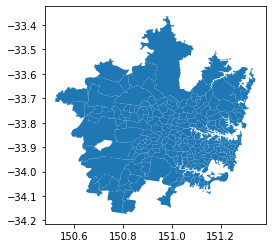

In [8]:
syd_ucl = gpd.read_file('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\SA2 Shapefiles\\sa2_ucl.dbf')
syd_ucl['SA2_MAIN16']=syd_ucl['SA2_MAIN16'].astype(int)
syd_ucl.plot()

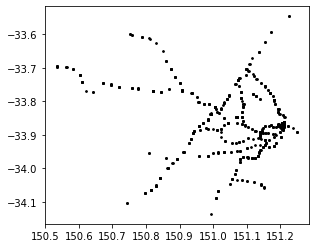

In [9]:
stations = gpd.read_file('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\Transportation Shapefiles\\entrances_ucl_ryan.dbf')
stations.plot(markersize=3, color="black")

In [70]:
#merge 2011 and 2016 income data with UCL SA2 data
types_map = pd.merge(syd_ucl, df, left_on='SA2_MAIN16', right_on='SA2_MAINCODE_2016', how='left').copy()
types_map = types_map.query('rentals_ov100_11 != 0')

In [71]:
types_map_LI = types_map.query('types_lowinc != 0')
types_map_HI = types_map.query('types_highinc != 0')


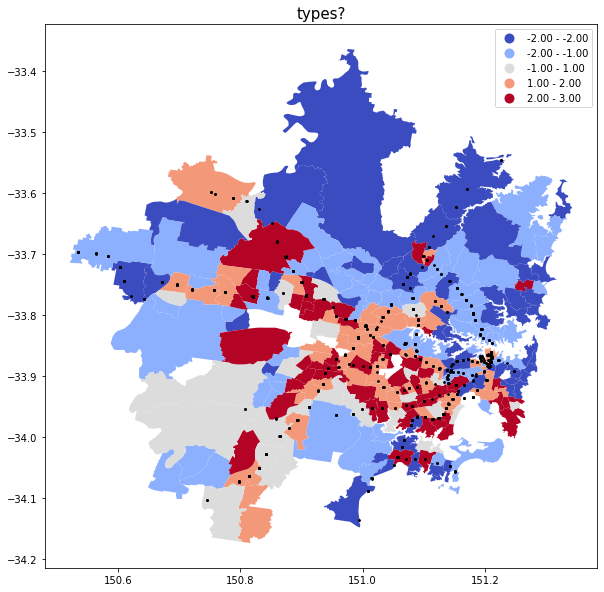

In [29]:
figure, ax = plt.subplots(figsize=(12,10))
base = types_map.plot(column="types", scheme = "fisher_jenks", k = 5, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("types?", fontdict={'fontsize':15})

stations.plot(ax=base, markersize=3, color="black")

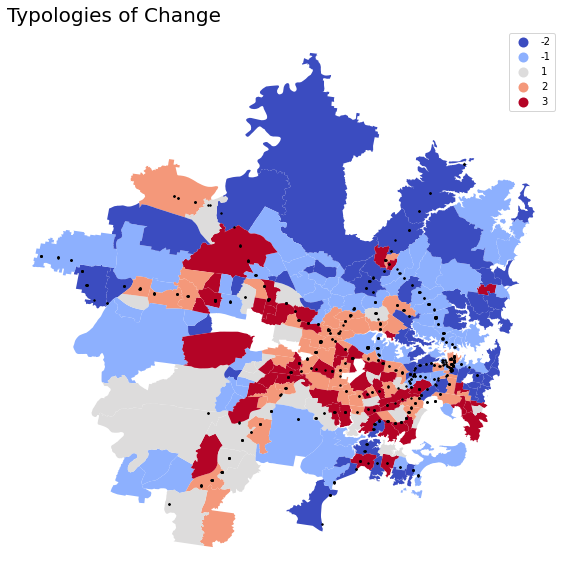

In [63]:
figure, ax = plt.subplots(figsize=(12,10))
ax.set_title("Typologies of Change", loc='left', fontdict={'fontsize':20})
ax.set_axis_off()

types_map.plot(
    column="types",
    categorical=True, 
    legend=True, 
    ax=ax, 
    cmap="coolwarm")


stations.plot(
    ax=ax, 
    markersize=2,
    color="black")

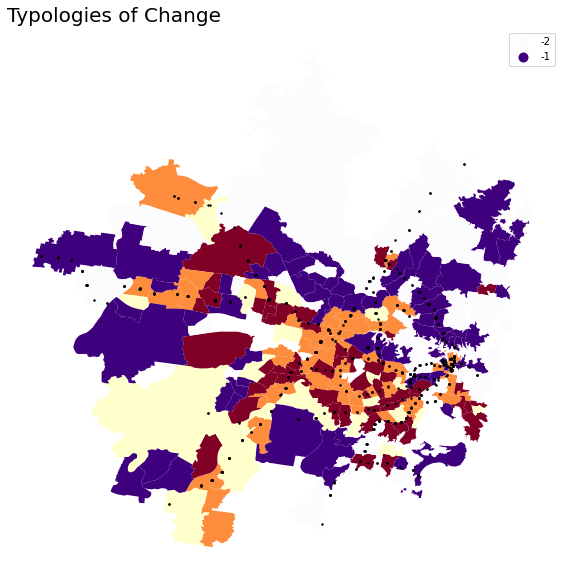

In [73]:
figure, ax = plt.subplots(figsize=(12,10))
ax.set_title("Typologies of Change", loc='left', fontdict={'fontsize':20})
ax.set_axis_off()

types_map_LI.plot(
    column="types_lowinc",
    categorical=True, 
    legend=True, 
    ax=ax,
    cmap='YlOrRd')

types_map_HI.plot(
    column="types_highinc",
    categorical=True, 
    legend=True, 
    ax=ax,
    cmap='Purples')


stations.plot(
    ax=ax, 
    markersize=2,
    color="black")